In [15]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 


train_df = pd.read_csv('data/train.csv') 
test_df = pd.read_csv('data/test.csv')    


test_ids = test_df['PassengerId'].copy()

print("Training set shape (rows, columns):", train_df.shape)
print("First 5 rows of the training set:")
print(train_df.head(5))

print("\nOverview of training data:")
train_df.info()

Training set shape (rows, columns): (8693, 14)
First 5 rows of the training set:
  PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0     


Transported value counts in training data:
Transported
True     4378
False    4315
Name: count, dtype: int64


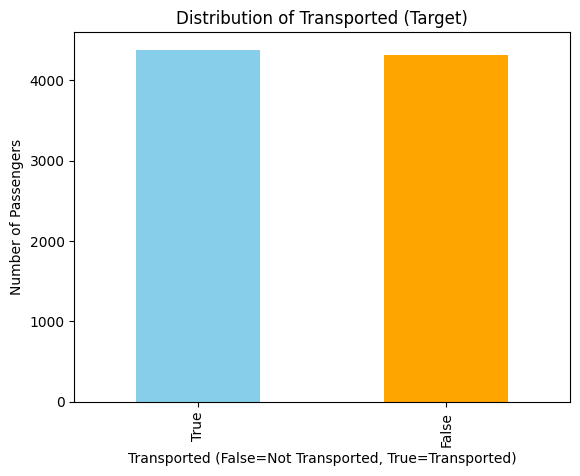

In [16]:
print("\nTransported value counts in training data:")
print(train_df['Transported'].value_counts())


train_df['Transported'].value_counts().plot(kind='bar', color=['skyblue','orange'])
plt.title('Distribution of Transported (Target)')
plt.xlabel('Transported (False=Not Transported, True=Transported)')
plt.ylabel('Number of Passengers')
plt.show()

In [18]:
y = train_df['Transported']  
train_df.drop(['PassengerId', 'Name', 'Cabin', 'Transported'], axis=1, inplace=True)
train_df['CryoSleep'].fillna(False, inplace=True)
train_df['VIP'].fillna(False, inplace=True)       


numeric_cols = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for col in numeric_cols:
    median_val = train_df[col].median() 
    train_df[col].fillna(median_val, inplace=True)

train_df['CryoSleep'] = train_df['CryoSleep'].astype(int) 
train_df['VIP'] = train_df['VIP'].astype(int)


train_df = pd.get_dummies(train_df, columns=['HomePlanet', 'Destination'])
print("Training features after preprocessing:")
print(train_df.head(5))
print("Columns in training data:", list(train_df.columns))

Training features after preprocessing:
   CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          0  39.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  24.0    0        109.0        9.0          25.0   549.0    44.0   
2          0  58.0    1         43.0     3576.0           0.0  6715.0    49.0   
3          0  33.0    0          0.0     1283.0         371.0  3329.0   193.0   
4          0  16.0    0        303.0       70.0         151.0   565.0     2.0   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0             False               True            False   
1              True              False            False   
2             False               True            False   
3             False               True            False   
4              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                    False            

In [24]:
# test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

test_df['CryoSleep'].fillna(False, inplace=True)
test_df['VIP'].fillna(False, inplace=True)

for col in numeric_cols: 
    median_val = train_df[col].median() 
    test_df[col].fillna(median_val, inplace=True)
    if col == 'HomePlanet':
        most_common = "Earth"
    if col == 'Destination':
        most_common = "TRAPPIST-1e"
        test_df[col].fillna(most_common, inplace=True)

test_df['CryoSleep'] = test_df['CryoSleep'].astype(int)
test_df['VIP'] = test_df['VIP'].astype(int)

test_df = pd.get_dummies(test_df, columns=['HomePlanet', 'Destination'])

test_df = test_df.reindex(columns=train_df.columns, fill_value=0)

print("Test features after preprocessing:")
print(test_df.head(5))
print("Columns in test data:", list(test_df.columns))

Test features after preprocessing:
   CryoSleep   Age  VIP  RoomService  FoodCourt  ShoppingMall     Spa  VRDeck  \
0          1  27.0    0          0.0        0.0           0.0     0.0     0.0   
1          0  19.0    0          0.0        9.0           0.0  2823.0     0.0   
2          1  31.0    0          0.0        0.0           0.0     0.0     0.0   
3          0  38.0    0          0.0     6652.0           0.0   181.0   585.0   
4          0  20.0    0         10.0        0.0         635.0     0.0     0.0   

   HomePlanet_Earth  HomePlanet_Europa  HomePlanet_Mars  \
0              True              False            False   
1              True              False            False   
2             False               True            False   
3             False               True            False   
4              True              False            False   

   Destination_55 Cancri e  Destination_PSO J318.5-22  Destination_TRAPPIST-1e  
0                    False                

In [25]:

from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df, y, test_size=0.2, random_state=42)

print("Training set size:", len(X_train), "passengers")
print("Validation set size:", len(X_val), "passengers")

Training set size: 6954 passengers
Validation set size: 1739 passengers


In [26]:

from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(random_state=42)

model.fit(X_train, y_train)

print("Model training complete.")

Model training complete.


In [27]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_val)

accuracy = accuracy_score(y_val, y_pred)
print(f"Accuracy on validation set: {accuracy*100:.2f}%")

Accuracy on validation set: 73.61%


In [28]:
test_predictions = model.predict(test_df)

output_df = pd.DataFrame({
    'PassengerId': test_ids,      
    'Transported': test_predictions  
})

print("Sample predictions on test set:")
print(output_df.head(10))
output_df.to_csv('submission.csv', index=False)

Sample predictions on test set:
  PassengerId  Transported
0     0013_01         True
1     0018_01        False
2     0019_01         True
3     0021_01         True
4     0023_01        False
5     0027_01         True
6     0029_01         True
7     0032_01         True
8     0032_02         True
9     0033_01        False
